In [147]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'

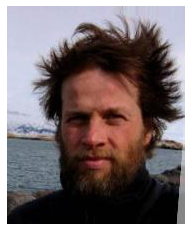

In [55]:
import torch
from torch import nn
from torch.utils.data import Dataset,DataLoader
import os
import matplotlib.pyplot as plt
import numpy as np

class Dataset(Dataset):
    def __init__(self,img_file):
        self.img_file = os.listdir(img_file)
        self.img_path = img_file
    def __len__(self):
        return len(self.img_file)
    
    def __getitem__(self,index):
        if index>len(self.img_file):
            raise IndexError()
        img = plt.imread(self.img_path+'\\'+self.img_file[index])
        return torch.FloatTensor(img)/255.
    
    def plot_img(self,index):
        if index>len(self.img_file):
            raise IndexError()
        img = plt.imread(self.img_path+'\\'+self.img_file[index])
        plt.imshow(img)
        plt.axis('off')
        plt.show()
dataset = Dataset(r'E:\浏览器下载\img_align_celeba')
dataset.plot_img(10000)

In [149]:
if torch.cuda.is_available():
    torch.set_default_tensor_type(torch.cuda.FloatTensor)
    print('GPU:',torch.cuda.get_device_name())
device = torch.device('cuda'if torch.cuda.is_available() else 'cpu')
print(device)

print(torch.cuda.memory_allocated(device)/(1024**3))

GPU: GeForce RTX 2060
cuda
4.312526226043701


In [57]:
#构建判别器

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator,self).__init__()
        self.model = nn.Sequential(nn.Linear(218*178*3,100),
                                   nn.LeakyReLU(),
                                   nn.LayerNorm(100),
                                   nn.Linear(100,1),
                                   nn.Sigmoid())
        self.counter = 0
        self.process = []
        self.loss = nn.BCELoss()
        self.optimizer = torch.optim.Adam(self.parameters(),lr=0.01)
    def forward(self,x):
        x = x.view(len(x),218*178*3)
        return self.model(x)
    
    def train(self,input,target):
        output = self.forward(input)
#         print(output.shape,target.shape)
        loss = self.loss(output,target)
        
        if self.counter % 100 == 0:
            self.process.append(loss.item())
        if self.counter % 1000 == 0:
            print('counter:',self.counter)
        self.counter += 1
        
        
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
    def plot_loss(self):
        plt.plot(self.process)
        plt.show()

def generate_random(size):
    arr = np.array([np.random.randn(*size) for _ in range(10)])
    return torch.FloatTensor(arr)

D = Discriminator().cuda()
dataset = DataLoader(dataset,batch_size=10,shuffle=True,drop_last=True)

for i,image in enumerate(dataset):
    D.train(image.cuda(),torch.FloatTensor([[1.0] for _ in range(10)]).cuda())
    D.train(generate_random((218,178,3)).cuda(),torch.FloatTensor([[0.0] for _ in range(10)]).cuda())
    
# print(torch.cuda.memory_allocated(device)/1024/1024/1024)
# print(torch.cuda.memory_summary(device,abbreviated=True))

counter: 0
counter: 1000
counter: 2000


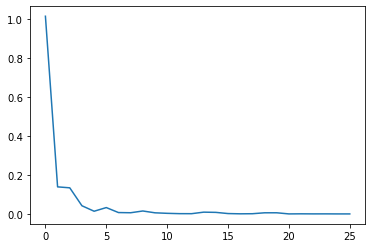

In [58]:
D.plot_loss()

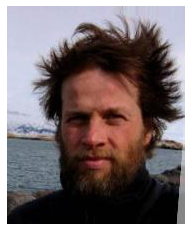

In [143]:
import torch
from torch import nn
from torch.utils.data import Dataset,DataLoader
import os
import matplotlib.pyplot as plt
import numpy as np

class Dataset(Dataset):
    def __init__(self,img_file):
        self.img_file = os.listdir(img_file)
        self.img_path = img_file
    def __len__(self):
        return len(self.img_file)
    
    def __getitem__(self,index):
        if index>len(self.img_file):
            raise IndexError()
        img = plt.imread(self.img_path+'\\'+self.img_file[index])
        return torch.FloatTensor(img)/255.
    
    def plot_img(self,index):
        if index>len(self.img_file):
            raise IndexError()
        img = plt.imread(self.img_path+'\\'+self.img_file[index])
        plt.imshow(img)
        plt.axis('off')
        plt.show()
dataset = Dataset(r'E:\浏览器下载\img_align_celeba')
dataset.plot_img(10000)

In [144]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator,self).__init__()
        self.model = nn.Sequential(nn.Linear(218*178*3,100),
                                   nn.LeakyReLU(),
                                   nn.LayerNorm(100),
                                   nn.Linear(100,1),
                                   nn.Sigmoid())
        self.counter = 0
        self.process = []
        self.loss = nn.BCELoss()
        self.optimizer = torch.optim.Adam(self.parameters(),lr=0.01)
    def forward(self,x):
#         print('x',x.shape)
        x = x.view(len(x),218*178*3)
#         print('x',x.shape)
        x = self.model(x)
#         print('x',x.shape)
        return x
    
    def train(self,input,target):
        output = self.forward(input)
        loss = self.loss(output,target)
        
        if self.counter % 100 == 0:
            self.process.append(loss.item())
        if self.counter % 1000 == 0:
            print('counter:',self.counter)
        self.counter += 1
        
        
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
    def plot_loss(self):
        plt.plot(self.process)
        plt.show()


class Generator(nn.Module):
    def __init__(self):
        super(Generator,self).__init__()
        self.model = nn.Sequential(nn.Linear(100,3*10*10),
                                   nn.LeakyReLU(0.1),
                                   nn.LayerNorm(3*10*10),
                                   nn.Linear(300,3*218*178),
                                   nn.Sigmoid())
        self.loss = nn.BCELoss()
        self.optimizer = torch.optim.Adam(self.parameters(),lr=0.01)
        self.counter = 0
        self.process = []
    def forward(self,x):
        return self.model(x)
    def train(self,D,inputs,targets):
        outputs = G(inputs).view(len(inputs),218,178,3)
        outputs = D(outputs)
        loss = self.loss(outputs,targets)
        
        if self.counter%100 == 0:
            self.process.append(loss.item())
        if self.counter & 1000 == 0:   
            print(self.counter)
        
        self.counter += 1
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
    def plot_loss(self):
        plt.plot(self.process)
        plt.show()
        
def generate_random(size):
    arr = np.array([np.random.randn(*size) for _ in range(10)])
    return torch.cuda.FloatTensor(arr)

D = Discriminator().cuda()
G = Generator().cuda()


# generate_random((218, 178, 3)).shape
# D(generate_random((218, 178, 3))).shape
dataset = DataLoader(dataset,batch_size=10,shuffle=True,drop_last=True)
for epoch in range(3):
    for i,image in enumerate(dataset):
#         print(image.shape,torch.cuda.FloatTensor([[1.0] for _ in range(10)]).shape)
        D.train(image.cuda(),torch.cuda.FloatTensor([[1.0] for _ in range(10)]))
        D.train(G(generate_random([100]).cuda()).detach(),torch.cuda.FloatTensor([[0.0] for _ in range(10)]))
        G.train(D,generate_random([100]).cuda(),torch.cuda.FloatTensor([[1.0] for _ in range(10)]))

counter: 0
0


RuntimeError: CUDA out of memory. Tried to allocate 1.30 GiB (GPU 0; 6.00 GiB total capacity; 3.62 GiB already allocated; 698.44 MiB free; 3.90 GiB reserved in total by PyTorch)

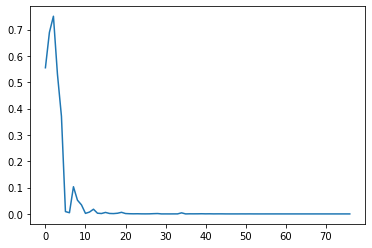

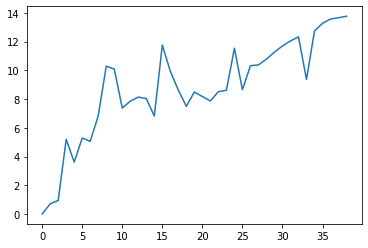

In [123]:
D.plot_loss()
G.plot_loss()

(10, 218, 178, 3)


<Figure size 432x288 with 0 Axes>

(218, 178, 3)


<AxesSubplot:>

(-0.5, 177.5, 217.5, -0.5)

(218, 178, 3)


<AxesSubplot:>

(-0.5, 177.5, 217.5, -0.5)

(218, 178, 3)


<AxesSubplot:>

(-0.5, 177.5, 217.5, -0.5)

(218, 178, 3)


<AxesSubplot:>

(-0.5, 177.5, 217.5, -0.5)

(218, 178, 3)


<AxesSubplot:>

(-0.5, 177.5, 217.5, -0.5)

(218, 178, 3)


<AxesSubplot:>

(-0.5, 177.5, 217.5, -0.5)

(218, 178, 3)


<AxesSubplot:>

(-0.5, 177.5, 217.5, -0.5)

(218, 178, 3)


<AxesSubplot:>

(-0.5, 177.5, 217.5, -0.5)

(218, 178, 3)


<AxesSubplot:>

(-0.5, 177.5, 217.5, -0.5)

(218, 178, 3)


<AxesSubplot:>

(-0.5, 177.5, 217.5, -0.5)

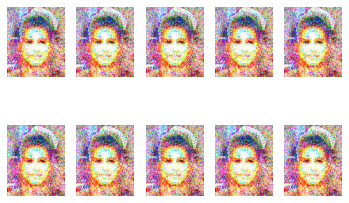

In [138]:
img = generate_random([100])
img = G(img).view(10,218,178,3).detach().cpu().numpy().clip(0,1)
print(img.shape)
plt.figure()
for i in range(10):
    print(img[i].shape)
    plt.subplot(2,5,i+1)
    plt.imshow(img[i])
    plt.axis('off')
plt.show()